In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.duplicated().sum()

418

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(49582, 2)

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

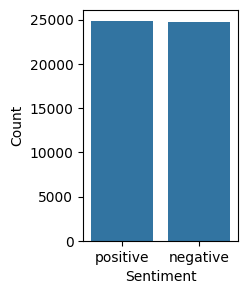

In [27]:
plt.figure(figsize = (2,3))
sns.countplot(x = df['sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [28]:
for i in range(5):
    print(f"Review: {i}")
    print(df['review'].iloc[i])
    print()
    print(f"Sentiment: {df['sentiment'].iloc[i]}")
    print('-'*100)

Review: 0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

In [29]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [30]:
df['word_count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [31]:
df['sentiment'].replace({"positive":1, "negative":0}, inplace = True)
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [32]:
def process_data(text):
    text = text.lower()
    text = re.sub('<br />', ' ', text)
    text = re.sub(r"https\S+|http\S+|www\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    cleaned_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(cleaned_text)

In [33]:
df['review'] = df['review'].apply(process_data)

In [34]:
df.duplicated().sum()

3

In [35]:
df.drop_duplicates(inplace = True)

In [36]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [37]:
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    words = text.split()
    lemmas = [lemmatizer.lemmatize(word, pos = 'v') for word in words]
    return ' '.join(lemmas)

In [38]:
df['review'] = df['review'].apply(lemmatization)

In [39]:
df['clean_word_count'] = df['review'].apply(no_of_words)

In [40]:
df.head()

,review,sentiment,word_count,clean_word_count
0,one reviewers mention watch 1 oz episode youll...,1,307,167
1,wonderful little production film technique una...,1,162,84
2,think wonderful way spend time hot summer week...,1,166,86
3,basically theres family little boy jake think ...,0,138,69
4,petter matteis love time money visually stun f...,1,230,125


In [41]:
df['review'].loc[0]

'one reviewers mention watch 1 oz episode youll hook right exactly happen first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy dealings shady agreements never far away would say main appeal show due fact go show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due lack street 

In [46]:
# Average word count across each sentiment

avg_pos_word_count = df[df['sentiment'] ==1]['clean_word_count'].mean()
avg_neg_word_count = df[df['sentiment'] ==0]['clean_word_count'].mean()

print(f"Average word count for positive reviews: {avg_pos_word_count} words")
print(f"Average word count for negative reviews: {avg_neg_word_count} words")

Average word count for positive reviews: 121.66475103484306 words
Average word count for negative reviews: 118.96027696793003 words


In [26]:
positive_reviews = df[df.sentiment == 1]
positive_reviews.head()

,review,sentiment,word_count,clean_word_count
0,one reviewers mention watch 1 oz episode youll...,1,307,168
1,wonderful little production film technique una...,1,162,84
2,think wonderful way spend time hot summer week...,1,166,86
4,petter matteis love time money visually stun f...,1,230,125
5,probably alltime favorite movie story selfless...,1,119,58


In [27]:
negative_reviews = df[df.sentiment == 0]
negative_reviews.head()

,review,sentiment,word_count,clean_word_count
3,basically theres family little boy jake think ...,0,138,67
7,show amaze fresh innovative idea 70s first air...,0,174,83
8,encourage positive comment film look forward w...,0,130,64
10,phil alien one quirky film humour base around ...,0,96,51
11,saw movie 12 come recall scariest scene big bi...,0,180,84


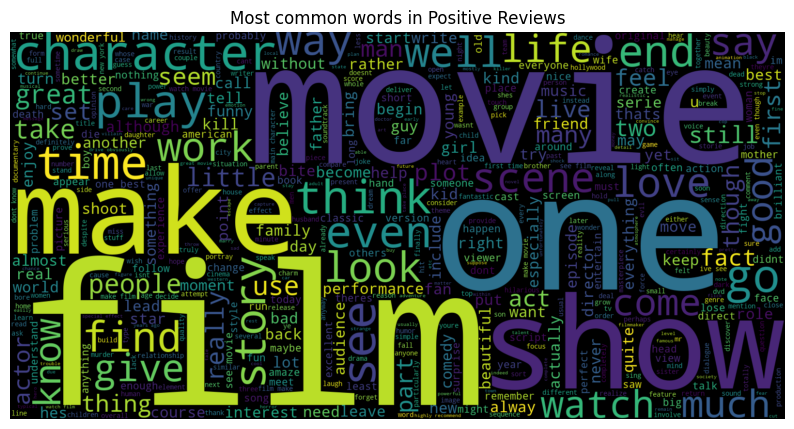

In [34]:
text = ' '.join([word for word in positive_reviews['review']])
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

plt.figure(figsize = (10,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in Positive Reviews')
plt.show()

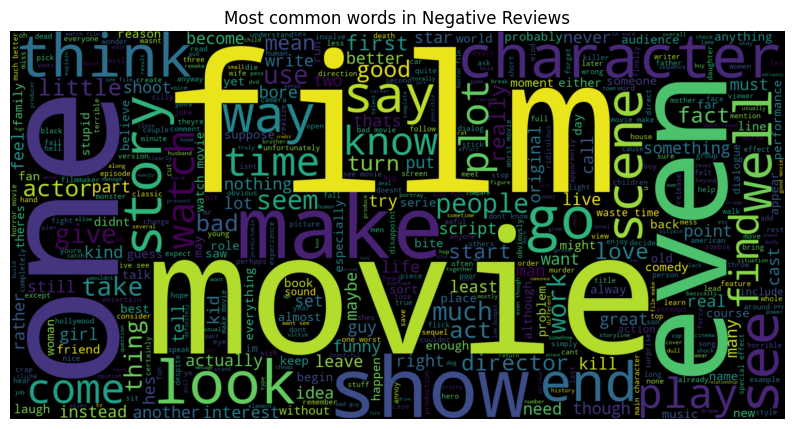

In [35]:
text = ' '.join([word for word in negative_reviews['review']])
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

plt.figure(figsize = (10,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in Negative Reviews')
plt.show()

In [39]:
from collections import Counter
count = Counter()
for text in positive_reviews['review'].values:
    for word in text.split():
        count[word] +=1
common_pos_words = count.most_common(15)
common_pos_words

[('film', 48841),
 ('movie', 35830),
 ('one', 25621),
 ('see', 21200),
 ('make', 20062),
 ('like', 19366),
 ('get', 15990),
 ('time', 15362),
 ('good', 14281),
 ('character', 13564),
 ('great', 12568),
 ('watch', 12411),
 ('story', 12338),
 ('go', 12246),
 ('show', 11845)]

In [40]:
pos_words = pd.DataFrame(common_pos_words)
pos_words.columns = ['Word', 'Count']
pos_words.head()

,Word,Count
0,film,48841
1,movie,35830
2,one,25621
3,see,21200
4,make,20062


In [42]:
for text in negative_reviews['review'].values:
    for word in text.split():
        count[word] +=1
common_neg_words = count.most_common(15)
common_neg_words

[('film', 91430),
 ('movie', 82832),
 ('one', 49982),
 ('make', 43603),
 ('like', 42568),
 ('see', 40282),
 ('get', 35153),
 ('time', 29502),
 ('good', 28277),
 ('character', 27336),
 ('watch', 26790),
 ('go', 26596),
 ('even', 24493),
 ('would', 23802),
 ('think', 23757)]

In [43]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['Word', 'Count']
neg_words.head()

,Word,Count
0,film,91430
1,movie,82832
2,one,49982
3,make,43603
4,like,42568


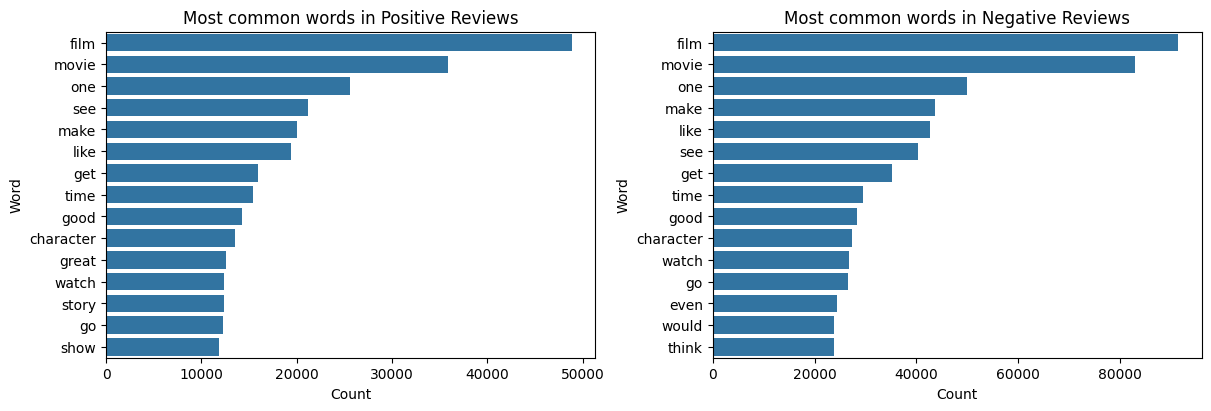

In [53]:
fig, axs = plt.subplots(1,2, figsize = (12,4), constrained_layout = True)

sns.barplot(pos_words, x = 'Count', y = 'Word', ax = axs[0])
axs[0].set_title('Most common words in Positive Reviews')

sns.barplot(neg_words, x = 'Count', y = 'Word', ax = axs[1])
axs[1].set_title('Most common words in Negative Reviews')

plt.show()

In [57]:
df.head()

,review,sentiment,word_count,clean_word_count
0,one reviewers mention watch 1 oz episode youll...,1,307,168
1,wonderful little production film technique una...,1,162,84
2,think wonderful way spend time hot summer week...,1,166,86
3,basically theres family little boy jake think ...,0,138,67
4,petter matteis love time money visually stun f...,1,230,125


In [56]:
X = df['review']
y = df['sentiment']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print(f"Training data shape: {X_train.shape, y_train.shape}")
print(f"Validation data shape: {X_val.shape, y_val.shape}")
print(f"Testing data shape: {X_test.shape, y_test.shape}")

Training data shape: ((34705,), (34705,))
Validation data shape: ((4958,), (4958,))
Testing data shape: ((9916,), (9916,))


In [59]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tr = tfidf.fit_transform(X_train)
X_val_tr = tfidf.transform(X_val)
X_test_tr = tfidf.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tr, y_train)
y_val_pred = model.predict(X_val_tr)
y_test_pred = model.predict(X_test_tr)

print(f"Validation set performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Classification Report: \n{classification_report(y_val, y_val_pred)}")
print(f"Confuconfusion Matrix: \n{confusion_matrix(y_val, y_val_pred)}")
print('-'*50)
print(f"Test set performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_test_pred)}")
print(f"Confuconfusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

Validation set performance:
Accuracy: 0.8513513513513513
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2478
           1       0.84      0.88      0.85      2480

    accuracy                           0.85      4958
   macro avg       0.85      0.85      0.85      4958
weighted avg       0.85      0.85      0.85      4958

Confuconfusion Matrix: 
[[2050  428]
 [ 309 2171]]
--------------------------------------------------
Test set performance:
Accuracy: 0.8586123436869706
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4909
           1       0.85      0.87      0.86      5007

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916

Confuconfusion Matrix: 
[[4144  765]
 [ 637 4370]]


In [63]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tr, y_train)
y_val_pred = model.predict(X_val_tr)
y_test_pred = model.predict(X_test_tr)

print(f"Validation set performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Classification Report: \n{classification_report(y_val, y_val_pred)}")
print(f"Confuconfusion Matrix: \n{confusion_matrix(y_val, y_val_pred)}")
print('-'*50)
print(f"Test set performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_test_pred)}")
print(f"Confuconfusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

Validation set performance:
Accuracy: 0.8221056877773296
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2478
           1       0.81      0.84      0.83      2480

    accuracy                           0.82      4958
   macro avg       0.82      0.82      0.82      4958
weighted avg       0.82      0.82      0.82      4958

Confuconfusion Matrix: 
[[1987  491]
 [ 391 2089]]
--------------------------------------------------
Test set performance:
Accuracy: 0.8328963291649859
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4909
           1       0.82      0.85      0.84      5007

    accuracy                           0.83      9916
   macro avg       0.83      0.83      0.83      9916
weighted avg       0.83      0.83      0.83      9916

Confuconfusion Matrix: 
[[4006  903]
 [ 754 4253]]


In [73]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_tr, y_train)
y_val_pred = model.predict(X_val_tr)
y_test_pred = model.predict(X_test_tr)

print(f"Validation set performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Classification Report: \n{classification_report(y_val, y_val_pred)}")
print(f"Confuconfusion Matrix: \n{confusion_matrix(y_val, y_val_pred)}")
print('-'*50)
print(f"Test set performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_test_pred)}")
print(f"Confuconfusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")

Validation set performance:
Accuracy: 0.8495361032674466
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2478
           1       0.84      0.87      0.85      2480

    accuracy                           0.85      4958
   macro avg       0.85      0.85      0.85      4958
weighted avg       0.85      0.85      0.85      4958

Confuconfusion Matrix: 
[[2052  426]
 [ 320 2160]]
--------------------------------------------------
Test set performance:
Accuracy: 0.859116579265833
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4909
           1       0.85      0.87      0.86      5007

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916

Confuconfusion Matrix: 
[[4143  766]
 [ 631 4376]]


In [89]:
new_review = input("Enter your review: ")
new_review_tfidf = tfidf.transform([new_review])
prediction = model.predict(new_review_tfidf)

# Display predictions
sentiment = "Positive" if pred == 1 else "Negative"
print(f"Review: '{new_review}' → Sentiment: {sentiment}")

Enter your review bad


Review: 'bad' → Sentiment: Negative


In [90]:
import joblib

joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
